# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

- Use pandas_datareader(): Up-to-date remote data access function for pandas
- for more details, see the following:
  - https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
!pip install pandas_datareader

# 국제 금가격 (런던 금시장)
- Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
  * (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
  * 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

- FRED (세인트루이스 연방준비은행 경제 데이터)
  - FRED changed URL structure for downloading CSV. (2022-09-30)

In [3]:
import pandas as pd
import pandas_datareader as pdr

In [6]:
# using pandas_datareader

df = pdr.DataReader('GDP', 'fred', start='1947-01-01')
pd.concat([df.head(3), df.tail(3)])

GDP
DATE                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
2023-07-01  27610.128
2023-10-01  27956.998
2024-01-01  28269.174

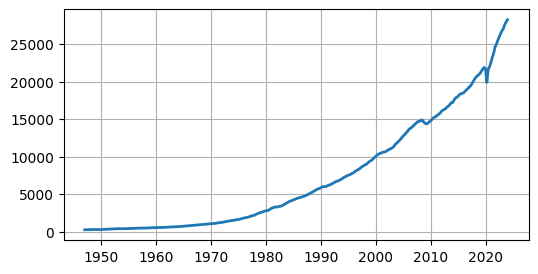

In [8]:
plt.figure(figsize=(6,3))
plt.plot(df['GDP'])

In [16]:
# or accessing directly from csv file
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=GDP')
pd.concat([df.head(3), df.tail(3)])

DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
306  2023-07-01  27610.128
307  2023-10-01  27956.998
308  2024-01-01  28269.174

<Axes: xlabel='DATE'>

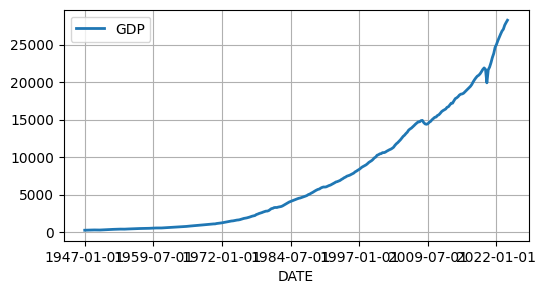

In [20]:
df.plot('DATE', 'GDP', figsize=(6,3))

# 국제 은 가격
- Quandl: 캐나다 토론토의 데이터 공유 플랫폼 회사입니다(특히 금융 데이터): https://www.quandl.com
- "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격

-  To access QUANDL,
  - (1)In order to retrieve data from quandl, you need to register for and input (via the parameter api_key or the environment variable QUANDL_API_KEY) a Quandl API key. Registering for a key can be done here (https://docs.quandl.com/docs#section-authentication).
  - (2) And also, you need to confirm the email message sent from quandl.

In [22]:
# 영국 은(silver)
API_KEY = 'NL_Uy8FexdtU3M6Zxb9a'
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', api_key=API_KEY, start='2000-01-01')
pd.concat([df_silver.head(3), df_silver.tail(3)])

USD       GBP      EURO
Date                                   
2023-12-29  23.7900  18.67000  21.48000
2023-12-28  24.2550  18.96000  21.81000
2023-12-27  24.0400  18.88000  21.74000
2000-01-06   5.1400   3.11515   4.94231
2000-01-05   5.2850   3.22354   5.10135
2000-01-04   5.3025   3.23225   5.13808

<Axes: xlabel='Date'>

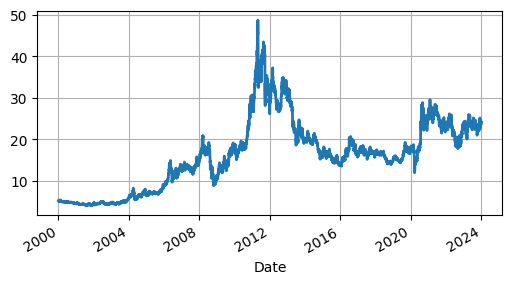

In [23]:
df_silver['USD'].plot(figsize=(6,3))

# Quandl library 를 이용하는 방법
- 퀀들(Quandl)은 캐나다 토론토의 데이터 공유 플랫폼 회사
- 금융 데이터를 퀀들이 제공하는 API를 통해 손쉽게 제공받아 분석에 활용할 수 있다.
- 퀀들 API는 퀀들 웹 사이트에 접속 후 가입 절차를 완료한 후 api_key를 발급받아 이용할 수 있다.
- https://wooiljeong.github.io/python/data_collecting_tutorial/

In [25]:
!pip install quandl

In [27]:
import quandl

quandl.ApiConfig.api_key = 'NL_Uy8FexdtU3M6Zxb9a'
df_gold = quandl.get(dataset='LBMA/GOLD', start_date='2010-01-01', end_date='2022-09-01')
pd.concat([df_gold.head(3), df_gold.tail(3)])

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2010-01-04   1113.00   1121.50   686.825   693.483    774.261    777.470
2010-01-05   1125.25   1123.25   701.702   700.324    779.529    779.385
2010-01-06   1125.00   1130.00   702.774   708.020    783.317    786.579
2022-08-30   1734.00   1730.30  1475.810  1481.310   1726.370   1727.360
2022-08-31   1712.40   1715.90  1472.150  1478.080   1713.600   1715.210
2022-09-01   1706.00   1694.30  1471.080  1469.640   1701.740   1702.260

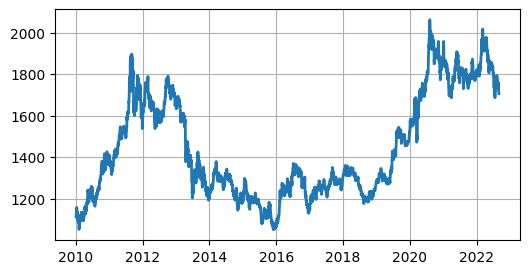

In [28]:
plt.figure(figsize=(6,3))
plt.plot(df_gold.iloc[:, 0])   # UsD

In [29]:
df_silver = quandl.get(dataset='LBMA/SILVER', start_date='2010-01-01', end_date='2022-09-01')
pd.concat([df_silver.head(3), df_silver.tail(3)])

USD      GBP     EURO
Date                                
2010-01-04  17.170  10.5857  11.9319
2010-01-05  17.570  10.9744  12.1845
2010-01-06  17.890  11.1952  12.4669
2022-08-30  18.695  15.9500  18.6400
2022-08-31  17.945  15.4400  17.9800
2022-09-01  17.770  15.3700  17.7400

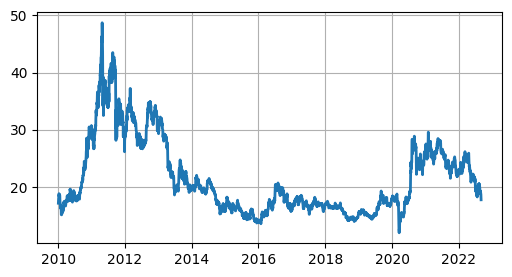

In [30]:
plt.figure(figsize=(6,3))
plt.plot(df_silver.iloc[:, 0])   # UsD

In [ ]:
# Copper is not available at this time
# df_copper = quandl.get(dataset='LME/PR_CU', start_date='2010-01-01', end_date='2022-09-01')
# df_copper.head(3).append(df_copper.tail(3))

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
- FRED stands for "Federal Reserve Economic Data," and it is an online database maintained and provided by the Federal Reserve Bank of St. Louis. FRED is one of the most comprehensive sources of economic and financial data available to the public.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [32]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')
df_oil.head(3)

POILDUBUSDM  POILWTIUSDM
DATE                                
2000-01-01    23.359524    27.224286
2000-02-01    24.720000    29.362381
2000-03-01    25.096957    29.892174

<Axes: xlabel='DATE'>

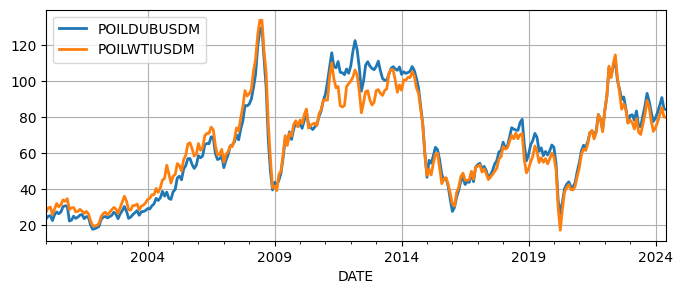

In [33]:
df_oil.plot(figsize=(8,3))

## 두 가격의 차이
- 두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다.

In [34]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

POILDUBUSDM  POILWTIUSDM      diff
DATE                                          
2023-09-01    93.238571    89.240952  3.997619
2023-10-01    88.787727    85.469091  3.318636
2023-11-01    82.640909    77.575455  5.065455
2023-12-01    77.569524    72.019524  5.550000
2024-01-01    79.582174    74.003043  5.579130
2024-02-01    82.809048    77.363810  5.445238
2024-03-01    86.633810    81.405714  5.228095
2024-04-01    90.869545    85.347273  5.522273
2024-05-01    84.666087    79.957391  4.708696
2024-06-01    84.112500    79.912500  4.200000

<Axes: xlabel='DATE'>

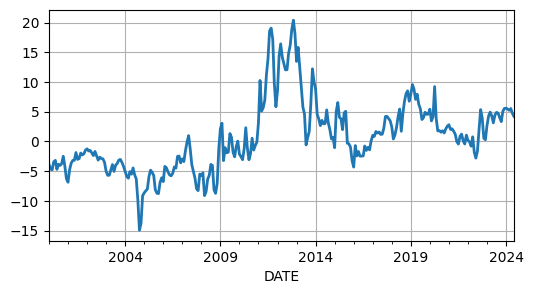

In [35]:
df_oil['diff'].plot(figsize=(6,3))

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.
  - use plt.fill_between(): Fill the area between two horizontal curves. The curves are defined by the points (x, y1) and (x, y2).

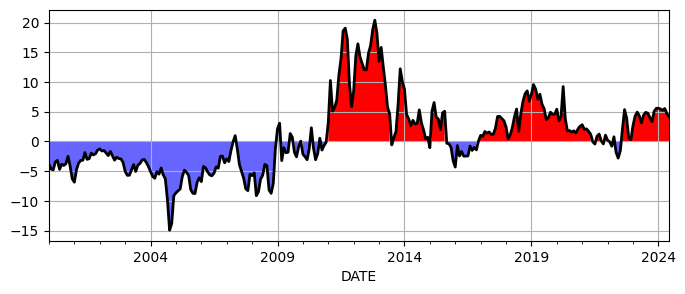

In [36]:
ax = df_oil['diff'].plot(color='k', figsize=(8,3))

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, y1=0, y2=y, where=y > 0 , facecolor='r')
ax.fill_between(x, y1=0, y2=y, where=y <= 0, facecolor='b', alpha=0.6)